# Literature screen

## Idea of this exercise is the screening of a PDF library for publications matching certain search criteria. The papers will be analyzed for their content of the search terms and a graphical output is produced that helps in paper selection.

### 1) Find all PDF documents in a given directory

We use here again the function _glob()_ from the module **glob**. Remember, _glob()_ has the advantage over other methods (e.g. function **os.**_listdir()_) that you can filter for files matching a certain pattern. I our case we will attempt to get a list of all documents ending with _.pdf_.

**1.1** First, we need to specify the _path_ where we want to look for pdf files. Next, we need to define the search pattern _pattern_ that matches for all PDF documents. We will use the file ending **.pdf**.

**What is new?**
* basically nothing. Just recall how to concatenate strings

In [5]:
import glob

pdfpath = 'data/pdf-exercise/pdflib'
pattern = '*pdf' ## our search pattern
combined = pdfpath + '/' + pattern ## concatenate the path with the search pattern into one string 
print ("I will look for files ending with", pattern, "in the directory", pdfpath, "\n") 

I will look for files ending with *pdf in the directory data/pdf-exercise/pdflib 



**1.2** In this step we extract the filenames of all files ending with **.pdf** in out directory _path_.

** What is new?**
* Nothing, just recall what glob.glob() is doing

In [6]:
dircont = glob.glob(combined)
print(dircont)

['data/pdf-exercise/pdflib/art%3A10.1186%2F1471-2148-8-327.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2F1471-2148-8-90.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2F1471-2148-8-95.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12862-016-0593-4.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12862-016-0599-y.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12862-016-0609-0.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12864-016-2438-3.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12864-016-2447-2.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12864-016-2449-0.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12864-016-2458-z.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12898-016-0056-1.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12898-016-0057-0.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12898-016-0058-z.pdf', 'data/pdf-exercise/pdflib/art%3A10.1186%2Fs12898-016-0059-y.pdf', 'data/pdf-exercise/pdflib/Koestler2010.BMCBioinf.pdf', 'data/pdf-exercise/pdflib/Ne

**1.3** Next, we want to reformat the list _dircont_ such that we only retain the filenames. We will use a split command here, putting the output into a list called _path_, and a string variable called _file_. Note the use of the asterisk in front of the variable _path_!

**What is new?**
* The results of the split command are placed into two variables, the list _dirpath_ (indicated by the asterisk!), and the str variable _file_. This syntax places everything but the last element resulting from the split command into the list _dirpath_. The last element will be stored in the variable _file_.

In [7]:
filelist = [] ## initialize an empty list
for file in dircont:
    if "/" in file: ## Execute the block only if the filename is preceeded by a path
        *dirpath, file = file.split("/")
    else:
        pass
    print (file)
    filelist.append(file)

art%3A10.1186%2F1471-2148-8-327.pdf
art%3A10.1186%2F1471-2148-8-90.pdf
art%3A10.1186%2F1471-2148-8-95.pdf
art%3A10.1186%2Fs12862-016-0593-4.pdf
art%3A10.1186%2Fs12862-016-0599-y.pdf
art%3A10.1186%2Fs12862-016-0609-0.pdf
art%3A10.1186%2Fs12864-016-2438-3.pdf
art%3A10.1186%2Fs12864-016-2447-2.pdf
art%3A10.1186%2Fs12864-016-2449-0.pdf
art%3A10.1186%2Fs12864-016-2458-z.pdf
art%3A10.1186%2Fs12898-016-0056-1.pdf
art%3A10.1186%2Fs12898-016-0057-0.pdf
art%3A10.1186%2Fs12898-016-0058-z.pdf
art%3A10.1186%2Fs12898-016-0059-y.pdf
Koestler2010.BMCBioinf.pdf
Nehrt2011.PloSCompBiol.pdf
Nikolenko2013.BMCGenomics.pdf


### 2) Convert a PDF (binary) into a human readable txt file (human readable). 
To achieve this we need to first see how to execute an external program from within our Python code. We will use the module **subprocess** for this purpose.


**2.1** Let's first import the module into our script. 

In [4]:
import subprocess

**2.2** We next specify the program that we want to call from our script. Here we use exemplarily _ls_ to list the contents of a directory. Note, this is another way to access directory contents...

In [5]:
command = 'ls'
print ("The command you want to execute reads: ", command + ' ' + pdfpath, '\n')

The command you want to execute reads:  ls /Users/ingo/python/pdflib 



**2.3** Now that we have specified the program that we want to execute, we can actually do it via making a call to the operation system.

**What is new?**
* We can now execute any function or program from the operating system. With the help of stdout=subprocess.PIPE we direct the output of the program we call into the communication with the Python script.

In [6]:
# just take the syntax as granted..
pobj = subprocess.Popen([command, pdfpath], stdout=subprocess.PIPE, stderr=subprocess.STDOUT) 
output, error = pobj.communicate() # the function communicate returns a tuple
    
# we want to learn something about the data type of the variable output using the function type()
ot = type(output) 
print ("The data type of my variable is: ", ot, '\n')

The data type of my variable is:  <class 'bytes'> 



**2.4** We have successfully executed the _command_ and captured the output via _pobj.communicate_ in the variable _output_. This, however, is of type _byte_. We will now decode it into a variable of type _str_.

**What is new?**
* The function decode() can be used for decoding a binary data type into a str

In [7]:
## type conversion using the function decoding()
output = output.decode() 
print ("The data type of my variable is now:", type(output), '\n')
print(output)
output = output.strip() ## remember, this gets rid of the last '\n' in the string.

The data type of my variable is now: <class 'str'> 

E-PhylogenyReconstruction.pdf
E.Bookchapter-phylogenomics.pdf
E2002.AJHG.pdf
E2012a.MBE.pdf
E2013.NAR.pdf
Koestler2010.BMCBioinf.pdf
Koestler2011.GBE.pdf
Koestler2012a.MBE.pdf
Narechania2012a.GBE.pdf
Near2012.PNAS.pdf
Negrisolo2010.MBE.pdf
Nehrt2011.PloSCompBiol.pdf
Nesnidal2010a.MBE.pdf
Nguyen2011a.MBE.pdf
Nguyen_Feb2009.Masterthesis.pdf
Nikolenko2013.BMCGenomics.pdf
Nishida1993.MBE.pdf
Nitschke2013.BBA.pdf
Nover2001.CSC.pdf



**2.5** Although the output already looks like a list, it is in fact just a string. You can check it with a print (output[0]). We will therefore convert it now into a list using the function _split()_.

**What is new?**
* Nothing

In [8]:
pdflist = output.split("\n") 
print ("The directory",pdfpath,"has the follwing content:")
## now print the output to the screen (stdout)
for entry in pdflist:
    print ('filename is:', entry)

The directory /Users/ingo/python/pdflib has the follwing content:
filename is: E-PhylogenyReconstruction.pdf
filename is: E.Bookchapter-phylogenomics.pdf
filename is: E2002.AJHG.pdf
filename is: E2012a.MBE.pdf
filename is: E2013.NAR.pdf
filename is: Koestler2010.BMCBioinf.pdf
filename is: Koestler2011.GBE.pdf
filename is: Koestler2012a.MBE.pdf
filename is: Narechania2012a.GBE.pdf
filename is: Near2012.PNAS.pdf
filename is: Negrisolo2010.MBE.pdf
filename is: Nehrt2011.PloSCompBiol.pdf
filename is: Nesnidal2010a.MBE.pdf
filename is: Nguyen2011a.MBE.pdf
filename is: Nguyen_Feb2009.Masterthesis.pdf
filename is: Nikolenko2013.BMCGenomics.pdf
filename is: Nishida1993.MBE.pdf
filename is: Nitschke2013.BBA.pdf
filename is: Nover2001.CSC.pdf


**2.6** In the next step we want to now apply the _subprocess_ call to convert a PDF into a plain text file. This is necessary as there is no straightforward method in Python to extract contents directly from a PDF. To do so, we will first need to specify the filename for the output file. we want to name the outfile just as the infile but with a different ending. So we use the function _split()_ and define the period '.' as the pattern where to split the string. As a filename can contain more than one '.' we will store everythin up to the last '.' in a list _filecomp_ (see above), and the file ending in the variable _ending_. Subsequently, we concatenate all list elements and append the file ending '.txt'

**What is new?**
* Just recall the meaning of the asterisk in front of a variable, especially in the context of _split()_

In [9]:
## determine the output path
txtpath = 'data/pdf-exercise/txtlib'
filelist = {}
for pdf in pdflist:
    ## 
    *filecomp, ending = pdf.split('.')
    filename = ''
    for i in range(len(filecomp)):
        filename = filename + filecomp[i] + '.'
    
    ## now we append the ending '.txt' to the filename
    txtfile = filename + 'txt'
    filelist[pdf] = txtfile
    print (pdf)
    print (txtfile)

E-PhylogenyReconstruction.pdf
E-PhylogenyReconstruction.txt
E.Bookchapter-phylogenomics.pdf
E.Bookchapter-phylogenomics.txt
E2002.AJHG.pdf
E2002.AJHG.txt
E2012a.MBE.pdf
E2012a.MBE.txt
E2013.NAR.pdf
E2013.NAR.txt
Koestler2010.BMCBioinf.pdf
Koestler2010.BMCBioinf.txt
Koestler2011.GBE.pdf
Koestler2011.GBE.txt
Koestler2012a.MBE.pdf
Koestler2012a.MBE.txt
Narechania2012a.GBE.pdf
Narechania2012a.GBE.txt
Near2012.PNAS.pdf
Near2012.PNAS.txt
Negrisolo2010.MBE.pdf
Negrisolo2010.MBE.txt
Nehrt2011.PloSCompBiol.pdf
Nehrt2011.PloSCompBiol.txt
Nesnidal2010a.MBE.pdf
Nesnidal2010a.MBE.txt
Nguyen2011a.MBE.pdf
Nguyen2011a.MBE.txt
Nguyen_Feb2009.Masterthesis.pdf
Nguyen_Feb2009.Masterthesis.txt
Nikolenko2013.BMCGenomics.pdf
Nikolenko2013.BMCGenomics.txt
Nishida1993.MBE.pdf
Nishida1993.MBE.txt
Nitschke2013.BBA.pdf
Nitschke2013.BBA.txt
Nover2001.CSC.pdf
Nover2001.CSC.txt


**2.7** We will now proceed to the actual file conversion. For this purpose we will call the external program _pdf2txt.py_. The syntax for using this Python script in the shell is **pdf2txt.py -o paper.txt paper.pdf**. We will put together this program call in the script and then execute it via **subprocess**. Note, as file conversion takes some time, this routine will checke whether the converted txt-file is already existing.

**What is new?**
* The function _os.path.exists()_ can be used to check whether a certain file already exists at a specific position in the file system. The function returns either _True_ or _False_.
* The _shell=True_ command in the _subprocess.Popen()_ call tells that the script should execute the specified command via a shell. Note, it is for security reasons often deprecated to use this command.

In [10]:
import os
## compile the program call
command = 'pdf2txt.py'
for currpdf, currtxt in filelist.items():
    if os.path.exists(txtpath + '/' + currtxt):
        pass ## the pdf has already been converted and we do nothing
    else:
        outfilecomp = '-o ' + txtpath + '/' + currtxt 
        toexecute = command + ' ' + outfilecomp + ' ' + pdfpath + '/' + currpdf
        print ("We will execute the following command: ", toexecute)

        ## execute the program call. Note the shell=True part, that tells Python to execute the command via a shell
        p = subprocess.Popen(toexecute, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        out, error = p.communicate() ## we do not really need this line here
print ("Done with conversion")

Done with conversion


**2.8** Now that we have generated the txt file version of the pdf, we want to analyse the contents of the publications. To do so, we have to first compile a list of keywords that we want to search for. We will generate a custom function _createDict_ to extract the keywords from a comma-separated string input by the user. These serve then as keys in a dictionary.

**What is new?**
* Remember how one defines a new function using _def_. Remember also, that the function has to be defined **before** the first call to it. 
* We define two functions:
    * _createDict()_ takes a comma-separated string as argument and generates a dictionary using the comma-separated entities as keys. The values are initialized with 0. Note the default values that are used when the function is called without handing over a string.
    * _resetCounts()_ takes a dictionary as argument and resets all values to 0.
* Recall that the function strip() is used to remove leading and trailing whitespaces and carriage returns '\n' from a string.
* The function _input()_ is a way to prompt for user input.

In [11]:
######## a small function to turn elements of a comma separated string into a dictionary
## Note the default values for the _str variable key
def createDict(keystring='bioinformatics, phylogeny, tree, alignment, evolution'):
    keywordlist = keystring.split(',')  
    keyworddict = {}
    for entry in keywordlist:
        entry = entry.strip()
        keyworddict[entry] = 0
    return(keyworddict)

## function cleanDict resets the values of a dictionary to 0 for all keys
def resetCounts(keyworddict):
    for key in keyworddict:
        keyworddict[key] = 0
    return keyworddict
######## End of the custom function definition

## Prompt the user for input
keys = input("Please provide a comma separated list of keywords or leave empty for the default keywords:")
if len(keys) > 0:
    keywords = createDict(keys)
else:
    # stick with the default list specified in the definition of createDict
    keywords = createDict()
keylist = keywords.keys()
for item in keylist:
    print (item)

Please provide a comma separated list of keywords or leave empty for the default keywords:microsporidia, phylogeny, phylogenetic, genome, alignment, likelihood, plant
genome
phylogenetic
microsporidia
likelihood
phylogeny
plant
alignment


**2.9** As a last step, we need to load the contents of the individual converted PDF files into memory and search for the keywords. 

**What is new?**
* First use of the module **codecs** for opening the file for reading, as this can handle different encodings. The parameter that are handed over are (i) path to file and file name, (ii), a 'r' indicating read access, and (iii) the file encoding.
* Recall the function append() that adds elements to the end of a list

In [12]:
import codecs
count = 0
result = []
for currpdf in pdflist:
    print ("\t", currpdf)
    currtxt = filelist[currpdf]
    filehandle = codecs.open(txtpath + '/' + currtxt,'r', encoding='UTF-8')
    content = []
    content = filehandle.readlines()
    for lines in content:
        for entry in keywords.keys():
            if entry in lines:
                keywords[entry] += 1
    intlist = []
    for entry in keylist:
        print ("\t\t", entry, ':', keywords[entry], "times")
        intlist.append(keywords[entry])
    result.append(intlist)
    count += 1    
    keywords = resetCounts(keywords)

	 E-PhylogenyReconstruction.pdf
		 genome : 12 times
		 phylogenetic : 95 times
		 microsporidia : 0 times
		 likelihood : 25 times
		 phylogeny : 20 times
		 plant : 1 times
		 alignment : 42 times
	 E.Bookchapter-phylogenomics.pdf
		 genome : 11 times
		 phylogenetic : 46 times
		 microsporidia : 0 times
		 likelihood : 15 times
		 phylogeny : 20 times
		 plant : 0 times
		 alignment : 25 times
	 E2002.AJHG.pdf
		 genome : 29 times
		 phylogenetic : 0 times
		 microsporidia : 0 times
		 likelihood : 0 times
		 phylogeny : 2 times
		 plant : 0 times
		 alignment : 13 times
	 E2012a.MBE.pdf
		 genome : 31 times
		 phylogenetic : 38 times
		 microsporidia : 2 times
		 likelihood : 3 times
		 phylogeny : 33 times
		 plant : 4 times
		 alignment : 20 times
	 E2013.NAR.pdf
		 genome : 14 times
		 phylogenetic : 25 times
		 microsporidia : 0 times
		 likelihood : 3 times
		 phylogeny : 6 times
		 plant : 15 times
		 alignment : 3 times
	 Koestler2010.BMCBioinf.pdf
		 genome : 10 times
		 ph

**2.10** Lastly, we will now visualize our results in a heatmap using **numpy** and **matplotlib.pyplot**

**What is new?**
* Recall the way to plot arrays in a heatmap (cf. Topic 1)
* We learn how to modify the ticklabels of the x- and the y-axis using the function matplotlib.plot.xticks and .ytics, respectively. The functions take as arguments (i) the number of ticks, (ii) the list of names to be used, and optionally (iii) the rotation angle.

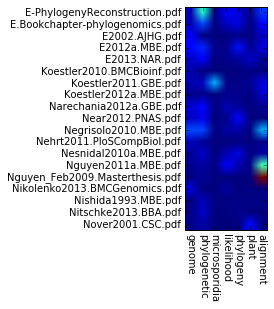

In [14]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## we will have to transform the nested list _result_ from the previous routine
## into an array
data = np.array(result)

## we hand now the data over to matplotlib.pyplot to generate an image object 
image  = plt.imshow(data)

## Now we modify the tick labels of the x- and the y-axis
## to match the pdfnames and the keywords
plt.xticks (np.arange(len(keylist)), (keylist), rotation = -90)
plt.yticks( np.arange(len(pdflist)), (pdflist) )

## and we plot the heatmap
plt.show()